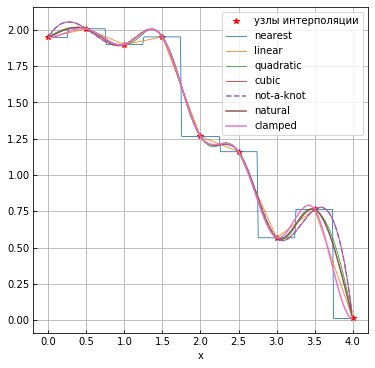

In [9]:
import scipy.interpolate
import numpy as np
import matplotlib.pyplot as plt

xi = np.array([0., 0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4.])
yi = np.array([1.948, 2.008, 1.899, 1.952, 1.266, 1.161, 0.568, 0.763, 0.012])

x_plot = np.linspace (0.01, 3.99, 250)
# y_plot = interpolation(x_plot, xi, yi)
y0 = scipy.interpolate.interp1d(xi,yi, kind = 'nearest')
y1 = scipy.interpolate.interp1d(xi,yi, kind = 'linear')
y2 = scipy.interpolate.interp1d(xi,yi, kind = 'quadratic')
y3 = scipy.interpolate.interp1d(xi,yi, kind = 'cubic')

cs1 = scipy.interpolate.CubicSpline(xi, yi, bc_type = 'not-a-knot')
cs2 = scipy.interpolate.CubicSpline(xi, yi, bc_type = 'natural')
cs3 = scipy.interpolate.CubicSpline(xi, yi, bc_type = 'clamped')

plt.figure(figsize = (6,6))
plt.tick_params (direction ='in')

plt.plot(xi, yi, "*", color = 'red',label = 'узлы интерполяции')
plt.plot(x_plot, y0(x_plot), linewidth = 0.8, label = 'nearest')
plt.plot(x_plot, y1(x_plot), linewidth = 0.8, label = 'linear')
plt.plot(x_plot, y2(x_plot), linewidth = 0.8, label = 'quadratic')
plt.plot(x_plot, y3(x_plot), linewidth = 0.8, label = 'cubic')
plt.plot(x_plot, cs1(x_plot), linestyle = '--', linewidth =1.5, label ='not-a-knot')
plt.plot(x_plot, cs2(x_plot),  linewidth =1.5, label ='natural')
plt.plot(x_plot, cs3(x_plot),  linewidth =1.5, label ='clamped')


plt.legend()
plt.xlabel('x')
plt.grid(True)
plt.show()

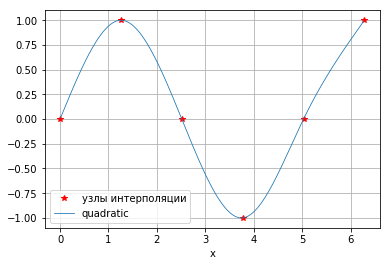

In [15]:
import scipy.interpolate
import numpy as np
import math
import matplotlib.pyplot as plt

xi = np.array([0., 2., 4., 6., 8., 10.])*np.pi/5.
yi = np.array([0., 1., 0., -1., 0., 1.])

x_plot = np.linspace (0.01, 2*np.pi-0.01, 250)
y = scipy.interpolate.CubicSpline(xi, yi, bc_type = 'natural')
plt.plot(xi, yi, "*", color = 'red',label = 'узлы интерполяции')
plt.plot(x_plot, y(x_plot), linewidth = 0.8, label = 'quadratic')


plt.legend()
plt.xlabel('x')
plt.grid(True)
plt.show()

In [6]:
def MyCubicSpline(xi, yi):
    xi = np.array(xi)
    yi = np.array(yi)
    n = len(xi)
    dx = np.diff(xi)
    dy = np.diff(yi)
    rs = np.zeros(n)
    rs[1:-1] = 3*(dy[1:]/dx[1:] - dy[:-1]/dx[:-1])
    
    matrix = np.zeros((n, n))
    for i in range (1, n-1):
        matrix[i, i] = 2*(dx[i-1]+dx[i]) #diagonal
    for i in range (1, n-1):
        matrix[i, i+1] = dx[i] # upper diagonal
    for i in range (0, n-2):
        matrix[i+1, i] = dx[i] #downer diagonal
    matrix[0,0] = matrix[-1,-1] = 1 #natural
    c = np.linalg.solve(matrix, rs)
    d = np.diff(c)/(3*dx)
    b = dy/dx - dx*(2*c[:-1] + c[1:])/3
    return b, c, d

In [7]:
b, c, d = MyCubicSpline(xi, yi)
print(b)
print(c)
print(d)

[ 0.2703542  -0.18070839  0.15847938 -0.78920913 -0.79964286 -0.75821944
 -0.35547938 -0.20786303]
[ 0.         -0.90212518  1.58050074 -3.47587776  3.45501031 -3.37216348
  4.17764359 -3.8824109   0.        ]
[-0.60141679  1.65508395 -3.370919    4.62059205 -4.55144919  5.03320471
 -5.37336966  2.58827393]


In [1]:
def MySEval(x, xi, yi, b, c, d):
    x = np.array(x)
    y = np.zeros((len(x)))
    m = 0
    for i in range(len(xi)-1):
        n = np.sum(x<xi[i+1]) - m
        xx = x[m:m+n] - xi[i]
        y[m:m+n] = yi[i] + b[i]*xx + c[i]*xx*xx+d[i]*xx*xx*xx
        m += n
    xx = x[m:] - xi[-2]
    y[m:] = yi[-2] + b[-1]*xx + c[-2]*xx*xx+d[-1]*xx*xx*xx
    return y